### Notebook for bottom up simulations

In [1]:
from PEPV import *
from compute_pe_truvada import *
from utils_avg_extinction_men import *
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\malin\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


### Finding prohylactic efficacy for hypotheses in isolation
PK at exposure site (local colon tissue) [0, 1, 0, 0, 1]
endogenous local dNTP tissue level [0, 0, 1, 0, 1]
route of exposure RAI [0, 0, 0, 0, 1]

for the baseline scenario on this (individuals are 100% adherent; efficacy markers: PBMC 
concentrations, dNTP concentrations from CD4+T cells and 100% RAI)

Question: the hypothesis [0, 1, 0, 0, 1] using PK for colon tissues - still has a high average prophylactic efficacy - whereas for women [0, 1, 0, 0] was much lower than the others


In [10]:
# find prophylactic efficacy for the individual "lights" at full adherence 

# to only see effect of 
# PK at exposure site (local colon tissue) and dNTP levels ind CD4+ cells [0, 1, 0, 0, 1]
# endogenous local dNTP tissue level and PBMC PK [0, 0, 1, 0, 1]
# route of exposure RAI [0, 0, 0, 0, 1]

indicators = [[0, 0, 0, 0, 1], [0, 1, 0, 0, 1], [0, 0, 1, 0, 1], [0, 1, 1, 0, 1]]
t0 = 0
tend = 90
weekly_adherence = [1]

pattern = np.array([weekly_adherence*tend])
print(pattern)



means_ind = []
means_ind_with_negative = []

for indicator in indicators:
    print(indicator)
    pe = compute_pe_truvada(indicator, adh_pattern=pattern, tend=tend)
    phi = process_pe_to_phi(indicator, [pe.numpy()])
    print(phi)
    mean_neg = np.mean(phi)
    mean_ = np.mean(phi[:-37])
    means_ind.append(mean_)
    means_ind_with_negative.append(mean_neg)

print(means_ind)
print( means_ind_with_negative)

# [0.9996344418808064, 0.9636617914591145, 0.9998114763983981]
# RAI, local PK in colon tissue cell, local colon tissue dNTPs

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
[0, 0, 0, 0, 1]
A new regimen added. please run the computation again. 
A new regimen added. please run the computation again. 
ODE solver for PK changed, please run the computation again. 
Time step for PK changed, please run the computation again.
(2161, 1)
[[ 0.99998914]
 [ 0.99998914]
 [ 0.99998914]
 ...
 [-5.19288303]
 [-6.06751976]
 [-7.03455234]]
[0, 1, 0, 0, 1]
A new regimen added. please run the computation again. 
A new regimen added. please run the computation again. 
ODE solver for PK changed, please run the computation again. 
Time step for PK changed, please run the computation again.
(2161, 1)
[[ 0.35202087]
 [ 0.39795742]
 [ 0.43730782]
 ...
 [-5.20591437]
 [-6.0742204 ]
 [-7.03455234]]
[0, 0, 1, 0, 1]
A new regimen added. please run the computation again. 
A new regimen added. please 

In [4]:
# Compute the PrEP efficacy of one certain dose for all 4 hypotheses

"""
sys.stdout.write('If other dosing regimen is desired, please replace dosing.csv in ../data/ \n')
dose = int(input('Please enter the number of doses per week: '))
tend = int(input('Please enter the duration of regimen in days: '))
adh = pd.read_csv('dosing.csv', index_col=0).iloc[[7 - dose]].values
print("adh")
print(adh)
"""
indicators = [[1, i, j, 0, 1] for i in range(2) for j in range(2)]
print(indicators)


[[1, 0, 0, 0, 1], [1, 0, 1, 0, 1], [1, 1, 0, 0, 1], [1, 1, 1, 0, 1]]


### Generating prophylactic efficacy profiles for each hypothesis for 90 days for weekly adherence 1,...,7 using dosing.csv

negative phi values ?

For weekly doses 1,...7:
For each indicator the phi over time is saved into a file and the averaged phi is saved (in the formula phihat_j)

In [10]:
def generate_phi(dose, tend = 90):
    indicators = [[1, i, j, 0, 1] for i in range(2) for j in range(2)]
    adh = pd.read_csv('dosing.csv', index_col=0).iloc[[7 - dose]].values
    mean_phi = []
    for indicator in indicators[:4]:
        print(indicator)
        # here only using pe_rai
        pe_rai = compute_pe_truvada(indicator, adh_pattern=adh, tend=tend)
        key = ''.join(map(str, indicator))
        phi = process_pe_to_phi(indicator, [pe_rai.numpy()])
        np.save("phi_{}_d{}".format(key, dose), phi)
        # question about negative phi values!!
        mean_ = np.mean(phi[:-37])
        mean_phi.append(mean_)
    return mean_phi

In [11]:
# saving efficacy over regimen period for each hypothesis and adherence level
for i in range(1,8):
    print(i)
    mean_ = generate_phi(dose = i, tend = 90)
    print(mean_)
# adherence level means for [1, 0, 0, 0, 1], [1, 0, 1, 0, 1], [1, 1, 0, 0, 1], [1, 1, 1, 0, 1]
# 1: [0.8521826364359174, 0.9088944039434358, 0.8001866920892536, 0.8181336022353246]
# 2: [0.9333735710656406, 0.9607941549150999, 0.8634506729902234, 0.8747672710118679]
# 3: [0.9843376331057571, 0.9992155723330519, 0.9202732527821852, 0.9297391624671061]
# 4: [0.994260794949365, 0.9996528448414463, 0.9265880908495859, 0.9347870965563846]
# 5: [0.9993736165668677, 0.9997445105325923, 0.9446621566303676, 0.9522668879994102]
# 6: [0.999575342993759, 0.9997951554614515, 0.9507987945234219, 0.9579483807248786]
# 7: [0.9996344418808064, 0.9998114763983981, 0.9636617914591145, 0.9704152907397626]

1
[1, 0, 0, 0, 1]
A new regimen added. please run the computation again. 
A new regimen added. please run the computation again. 
ODE solver for PK changed, please run the computation again. 
Time step for PK changed, please run the computation again.
(2161, 1)
[1, 0, 1, 0, 1]
A new regimen added. please run the computation again. 
A new regimen added. please run the computation again. 
ODE solver for PK changed, please run the computation again. 
Time step for PK changed, please run the computation again.
PD file changed
(2161, 1)
[1, 1, 0, 0, 1]
A new regimen added. please run the computation again. 
A new regimen added. please run the computation again. 
ODE solver for PK changed, please run the computation again. 
Time step for PK changed, please run the computation again.
(2161, 1)
[1, 1, 1, 0, 1]
A new regimen added. please run the computation again. 
A new regimen added. please run the computation again. 
ODE solver for PK changed, please run the computation again. 
Time step fo

In [23]:
# constructing a dictionary that contains average prophylactic efficay for each adherence level
# to be used in hypothesis_tester.py

phi_dict = dict()
for i, indicator in enumerate(indicators):
    print(i, indicator)
    key = ''.join(map(str, indicator))
    phi_dict[key] = list()
    for i in range(1,8):
        data = np.load("phi_{}_d{}.npy".format(key,i))
        phi_dict[key].append(data.mean())
print(phi_dict)

0 [1, 0, 0, 0, 1]
1 [1, 0, 1, 0, 1]
2 [1, 1, 0, 0, 1]
3 [1, 1, 1, 0, 1]
{'10001': [0.8256119498063447, 0.9062859807365935, 0.9563527894407503, 0.9661172635526987, 0.9713788263690433, 0.9716202007333552, 0.9717244186634107], '10101': [0.8819727562353268, 0.9334627621631426, 0.9712051670220229, 0.971636617272747, 0.971860882345768, 0.971933411572823, 0.9719740111373857], '11001': [0.7723918798266732, 0.8361740465470742, 0.8923314234662315, 0.8987491989417947, 0.9167563163292299, 0.9228908562111315, 0.9356077956347567], '11101': [0.7903677472161225, 0.8474998986958393, 0.9017957828137765, 0.9069416100158988, 0.9243532704278015, 0.9300317097607239, 0.9423560577518774]}


### Plotting prophylactic efficacy

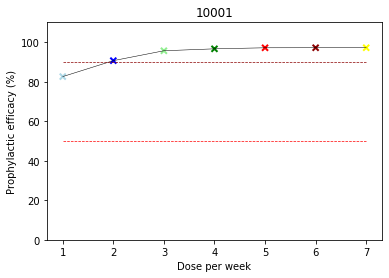

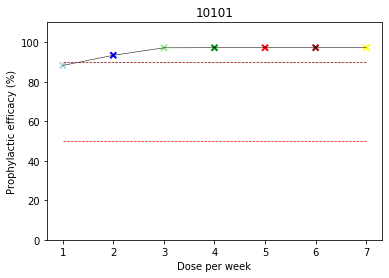

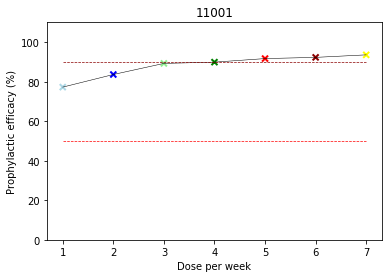

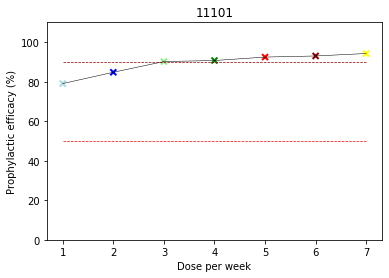

In [9]:
import matplotlib.cm as cm
phi_dict = {'10001': [0.8256119498063447, 0.9062859807365935, 0.9563527894407503, 0.9661172635526987, 0.9713788263690433, 0.9716202007333552, 0.9717244186634107], 
                '10101': [0.8819727562353268, 0.9334627621631426, 0.9712051670220229, 0.971636617272747, 0.971860882345768, 0.971933411572823, 0.9719740111373857], 
                '11001': [0.7723918798266732, 0.8361740465470742, 0.8923314234662315, 0.8987491989417947, 0.9167563163292299, 0.9228908562111315, 0.9356077956347567], 
                '11101': [0.7903677472161225, 0.8474998986958393, 0.9017957828137765, 0.9069416100158988, 0.9243532704278015, 0.9300317097607239, 0.9423560577518774]}


for key in phi_dict.keys():
    plt.scatter(range(1,8), np.asarray(phi_dict[key])*100, 
                color = ["lightblue", "blue", "lightgreen", "green", "red", "darkred", "yellow"], marker = "x", linewidth = 2)
    plt.plot(range(1,8), np.asarray(phi_dict[key])*100, color = "k", linewidth = 0.5)
    plt.plot(range(1,8), [50]*7, linestyle = "--", color = "red", linewidth = 0.7)
    plt.plot(range(1,8), [90]*7, linestyle = "--", color = "darkred",linewidth = 0.7)
    plt.ylim((0,110))
    plt.xlabel("Dose per week")
    plt.ylabel("Prophylactic efficacy (%)")
    plt.title(f"{key}")
    plt.show()
    

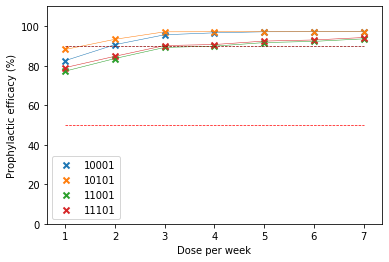


mean efficacy values for bottom-up hypotheses
['10001', '10101', '11001', '11101']
[0.9384416327574565, 0.9534350868213164, 0.8821287881366987, 0.8919065823831485]


In [12]:
import matplotlib.cm as cm
phi_dict = {'10001': [0.8256119498063447, 0.9062859807365935, 0.9563527894407503, 0.9661172635526987, 0.9713788263690433, 0.9716202007333552, 0.9717244186634107], 
                '10101': [0.8819727562353268, 0.9334627621631426, 0.9712051670220229, 0.971636617272747, 0.971860882345768, 0.971933411572823, 0.9719740111373857], 
                '11001': [0.7723918798266732, 0.8361740465470742, 0.8923314234662315, 0.8987491989417947, 0.9167563163292299, 0.9228908562111315, 0.9356077956347567], 
                '11101': [0.7903677472161225, 0.8474998986958393, 0.9017957828137765, 0.9069416100158988, 0.9243532704278015, 0.9300317097607239, 0.9423560577518774]}

mean_vals = []
key_vals = []
for key in phi_dict.keys():
    key_vals.append(key)
    m = np.mean(np.asarray(phi_dict[key]))
    mean_vals.append(m)
    plt.scatter(range(1,8), np.asarray(phi_dict[key])*100, 
                 marker = "x", linewidth = 2, label = f"{key}")
    plt.plot(range(1,8), np.asarray(phi_dict[key])*100, linewidth = 0.5)

plt.plot(range(1,8), [50]*7, linestyle = "--", color = "red", linewidth = 0.7)
plt.plot(range(1,8), [90]*7, linestyle = "--", color = "darkred",linewidth = 0.7)
plt.ylim((0,110))
plt.xlabel("Dose per week")
plt.ylabel("Prophylactic efficacy (%)")
plt.legend()
plt.show()

print("")
print("mean efficacy values for bottom-up hypotheses")
print(key_vals)
print(mean_vals)

### Plotting the corresponding inoculum size distribution of RAI

{0: 0.761614437859736, 1: 0.18505433485321826, 2: 0.039820605145656524, 3: 0.009511013180141413, 4: 0.002631419805472306, 5: 0.0008387724190673403, 6: 0.0003025140743945251, 7: 0.00012109490774327481, 8: 5.289290616530001e-05, 9: 2.4856785376663694e-05, 10: 1.2425693705033169e-05, 11: 6.546994139823568e-06, 12: 3.6090572147635154e-06, 13: 2.069010834968551e-06, 14: 1.2274582038638353e-06, 15: 7.505051010486227e-07, 16: 4.713295373561756e-07, 17: 3.0316193256320257e-07, 18: 1.9922636747021827e-07, 19: 1.334863934021065e-07}


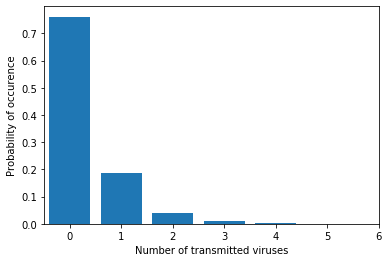

In [17]:
# get probability of incolum occurence for RAI
r_rai = 3.7e-3  # success rate of rai from ref 18

# probability (value) of each inoculum size (key)
dict_v2p_rai = {i: p_inoculum(r_rai, i)[0] for i in range(20)}
print(dict_v2p_rai)

keys = dict_v2p_rai.keys()
values = dict_v2p_rai.values()


plt.bar(keys, values)
plt.xlabel("Number of transmitted viruses")
plt.ylabel("Probability of occurence")
plt.xlim(-0.5,6)
plt.show()

### Probability of detectable plasma TFV (LLOQ = 0.001μM (IPERGAY) or 0.035μM (iPrEx)

to be used in hypothesis_tester.py

In [2]:
# getting probability of being below LLOQ of plasma TFV (compartemt 1 - C1)

def probability_lloq(dose,lloq):
    days = 90
    t0, t1 = 0, days*24

    adh = pd.read_csv('dosing.csv', index_col=0).iloc[[7 - dose]].values

    r = Regimen('FTC', 24, (t0, t1), 200, 30, 1, adh_pattern=adh)
    r1 = Regimen('TDF', 24, (t0, t1), 300, 30, 1, adh_pattern=adh)
    e = EfficacyPredictor()
    e.add_regimen(r)
    e.add_regimen(r1)
    e.compute_extinction_probability()
    pe = e.get_extinction_probability()
    print(pe.shape)

    c_tdf = e.get_concentration('TDF')
    c_ftc = e.get_concentration('FTC')

    c_tdf.shape, c_ftc.shape

    C1_tdf = np.array(c_tdf[:,0,0,0])
    #plt.plot([t/50/24 for t in range(len(C1_tdf))], C1_tdf, label = f"adherence {dose}", linewidth = 0.7)

    n_samples = len(C1_tdf)
    n_samples_above_LLOQ = sum(i>lloq for i in C1_tdf)
    prob = n_samples_above_LLOQ/n_samples
    
    return prob

# iprex = 10 ng/ml -- 0.035 micromolar
# hptn 083 = 0.31 ng/mL -- 0.001 micromolar

1
A new regimen added. please run the computation again. 
A new regimen added. please run the computation again. 
torch.Size([108001, 1, 1, 3, 1])
0.8102332385811243
2
A new regimen added. please run the computation again. 
A new regimen added. please run the computation again. 
torch.Size([108001, 1, 1, 3, 1])
0.9542226460866103
3
A new regimen added. please run the computation again. 
A new regimen added. please run the computation again. 
torch.Size([108001, 1, 1, 3, 1])
0.9888797325950686
4
A new regimen added. please run the computation again. 
A new regimen added. please run the computation again. 
torch.Size([108001, 1, 1, 3, 1])
0.9777687243636632
5
A new regimen added. please run the computation again. 
A new regimen added. please run the computation again. 
torch.Size([108001, 1, 1, 3, 1])
0.9888797325950686
6
A new regimen added. please run the computation again. 
A new regimen added. please run the computation again. 
torch.Size([108001, 1, 1, 3, 1])
0.9888797325950686
7
A 

C:\Users\malin\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


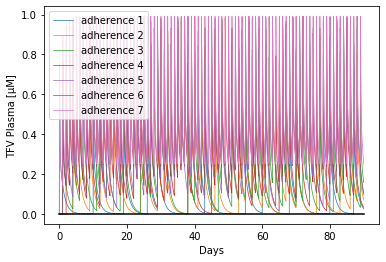

In [28]:
percentages001 = []
for i in range(1,8):
    print(i)
    prob = probability_lloq(i, 0.001)
    print(prob)
    percentages001.append(prob)
plt.plot([t for t in range(0,91)], [0.001]*91, color = 'k')
plt.xlabel("Days")
plt.ylabel("TFV Plasma [μM]")
plt.legend()
plt.show()

In [7]:
"""
percentages001 = [0.5904482365904019, 0.8375940963509597, 0.9591392672290071, 0.9616855399487042, 
               0.9888797325950686, 0.9888797325950686, 0.9999907408264739]
"""
percentages001 = [0.8102332385811243, 0.9542226460866103, 0.9888797325950686, 0.9777687243636632,
                 0.9888797325950686, 0.9888797325950686, 0.9999907408264739]
print(percentages001)
df = pd.DataFrame(percentages001)
print(df)
print("")
print(df.iloc[0])
print(percentages001/np.sum(percentages001))

[0.8102332385811243, 0.9542226460866103, 0.9888797325950686, 0.9777687243636632, 0.9888797325950686, 0.9888797325950686, 0.9999907408264739]
          0
0  0.810233
1  0.954223
2  0.988880
3  0.977769
4  0.988880
5  0.988880
6  0.999991

0    0.810233
Name: 0, dtype: float64
[0.12077073 0.14223332 0.14739919 0.14574302 0.14739919 0.14739919
 0.14905536]


In [5]:
df.to_csv('tvfPercConcOver001.csv')

Text(0, 0.5, 'Probability of detectable plasma TFV')

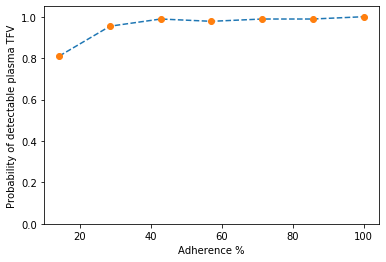

In [11]:
plt.plot([i/7*100 for i in range(1,8)], percentages001, linestyle = '--')
plt.plot([i/7*100 for i in range(1,8)], percentages001,'o')
plt.ylim(0, 1.05)
plt.xlabel("Adherence %")
plt.ylabel("Probability of detectable plasma TFV")

Text(0.5, 0, 'Adherence (dose/week)')

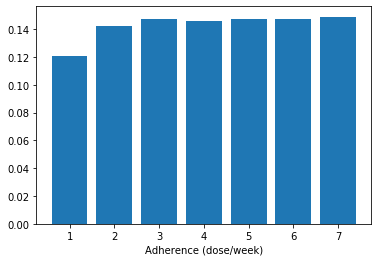

In [7]:
# bar graph for distribution of utilized adherence levels for bottoum up

plt.bar(range(1,8), percentages001/np.sum(percentages001))
plt.xlabel('Adherence (dose/week)')


In [8]:
percentages035 = []
for i in range(1,8):
    print(i)
    prob = probability_lloq(i, 0.035)
    print(prob)
    percentages035.append(prob)
print(percentages035)

1
A new regimen added. please run the computation again. 
A new regimen added. please run the computation again. 
torch.Size([108001, 1, 1, 3, 1])
0.3796724104406441
2
A new regimen added. please run the computation again. 
A new regimen added. please run the computation again. 
torch.Size([108001, 1, 1, 3, 1])
0.6666234571902112
3
A new regimen added. please run the computation again. 
A new regimen added. please run the computation again. 
torch.Size([108001, 1, 1, 3, 1])
0.8629549726391422
4
A new regimen added. please run the computation again. 
A new regimen added. please run the computation again. 
torch.Size([108001, 1, 1, 3, 1])
0.9332413588763067
5
A new regimen added. please run the computation again. 
A new regimen added. please run the computation again. 
torch.Size([108001, 1, 1, 3, 1])
0.9764631808964732
6
A new regimen added. please run the computation again. 
A new regimen added. please run the computation again. 
torch.Size([108001, 1, 1, 3, 1])
0.9888704734215424
7
A 

In [9]:
df2 = pd.DataFrame(percentages035)
print(df2)
df2.to_csv('tvfPercConcOver035.csv')

          0
0  0.379672
1  0.666623
2  0.862955
3  0.933241
4  0.976463
5  0.988870
6  0.999981


Text(0, 0.5, 'Probability of detectable plasma TFV')

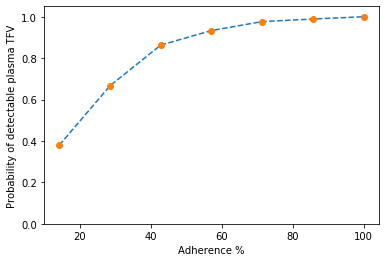

In [12]:
plt.plot([i/7*100 for i in range(1,8)], percentages035, linestyle = '--')
plt.plot([i/7*100 for i in range(1,8)], percentages035,'o')
plt.ylim(0, 1.05)
plt.xlabel("Adherence %")
plt.ylabel("Probability of detectable plasma TFV")

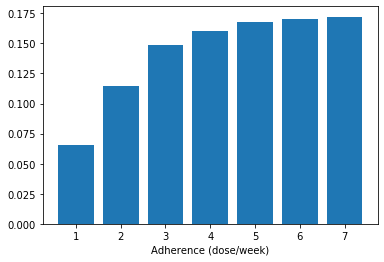

In [13]:
plt.bar(range(1,8), percentages035/np.sum(percentages035))
plt.xlabel('Adherence (dose/week)')
plt.show()

1
A new regimen added. please run the computation again. 
A new regimen added. please run the computation again. 
torch.Size([108001, 1, 1, 3, 1])
0.9054453199507412
2
A new regimen added. please run the computation again. 
A new regimen added. please run the computation again. 
torch.Size([108001, 1, 1, 3, 1])
0.9555467079008527
3
A new regimen added. please run the computation again. 
A new regimen added. please run the computation again. 
torch.Size([108001, 1, 1, 3, 1])
0.9888797325950686
4
A new regimen added. please run the computation again. 
A new regimen added. please run the computation again. 
torch.Size([108001, 1, 1, 3, 1])
0.9777687243636632
5
A new regimen added. please run the computation again. 
A new regimen added. please run the computation again. 
torch.Size([108001, 1, 1, 3, 1])
0.9888797325950686
6
A new regimen added. please run the computation again. 
A new regimen added. please run the computation again. 
torch.Size([108001, 1, 1, 3, 1])
0.9888797325950686
7
A 

NameError: name 'df2' is not defined

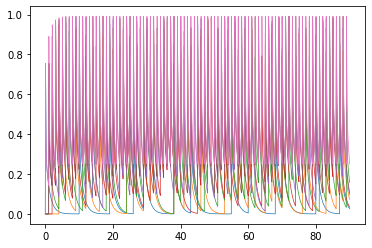

In [3]:
percentages0003 = []
for i in range(1,8):
    print(i)
    prob = probability_lloq(i, 0.0003)
    print(prob)
    percentages0003.append(prob)
print(percentages0003)
df3 = pd.DataFrame(percentages0003)
print(df3)


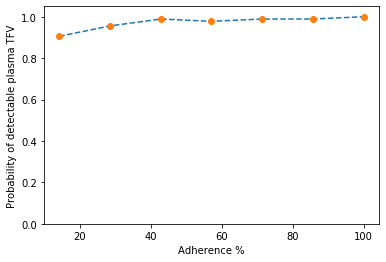

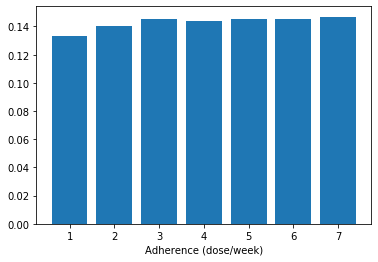

In [5]:
df3.to_csv('tvfPercConcOver0003.csv')
plt.plot([i/7*100 for i in range(1,8)], percentages0003, linestyle = '--')
plt.plot([i/7*100 for i in range(1,8)], percentages0003,'o')
plt.ylim(0, 1.05)
plt.xlabel("Adherence %")
plt.ylabel("Probability of detectable plasma TFV")
plt.show()

plt.bar(range(1,8), percentages0003/np.sum(percentages0003))
plt.xlabel('Adherence (dose/week)')
plt.show()

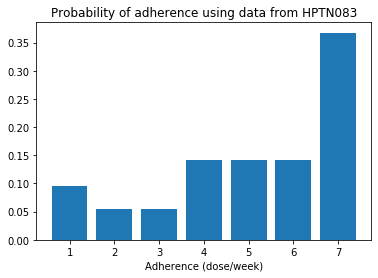

0.947193200903167


In [12]:
dfhptn = [0.0956, 0.054, 0.054, 0.1411, 0.1411, 0.1411, 0.3676]
plt.bar(range(1,8), dfhptn)
plt.xlabel('Adherence (dose/week)')
plt.title("Probability of adherence using data from HPTN083")
plt.show()

phi10001 = [0.8256119498063447, 0.9062859807365935, 0.9563527894407503, 0.9661172635526987, 0.9713788263690433, 0.9716202007333552, 0.9717244186634107]
print(np.sum([dfhptn[i]*phi10001[i] for i in range(7)]))


### Checking shape of phi npy files with those from GitHub

The shape is much larger in the GitHub - over 6000 days whereas here 90 days was used

In [8]:
phi_1000 = np.load("phi_1000.npy")
print(phi_1000.shape)
print(phi_1000)

(144000, 7)
[[0.02471099 0.11802666 0.79448307 ... 0.82777426 0.62851928 0.99658271]
 [0.35696451 0.74459788 0.96261417 ... 0.97811487 0.96185025 0.96194322]
 [0.22983755 0.56155876 0.98286403 ... 0.9885003  0.95662682 0.98532815]
 ...
 [0.08387496 0.55340812 0.96012243 ... 0.97235558 0.91720046 0.99994903]
 [0.30212549 0.95929277 0.99205694 ... 0.9985673  0.99999858 0.99973183]
 [0.02338517 0.68738838 0.946518   ... 0.95426923 0.91063865 0.95179285]]


In [7]:
phi_10001_d1 = np.load("phi_10001_d1.npy")
print(phi_10001_d1.shape)

(2161, 1)


### Plotting the phi over time for each adherence category

In [4]:


def plot_phi(hyp):
    t = [t/24 for t in range(-1,90*24)]
    for i in range(1,8):
        phi = np.load(f"phi_{hyp}_d{i}.npy")
        plt.plot(t[:-37],phi[:-37]*100, label = f"{i}/7 weekly doses")
    plt.xlabel("Days")
    plt.ylabel("Efficacy (%)")
    plt.title(f"{hyp} Efficacy")
    plt.legend()
    plt.show

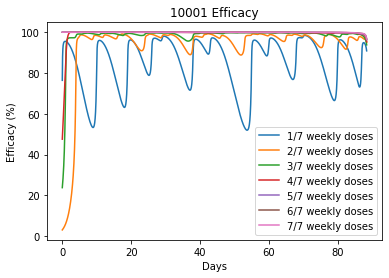

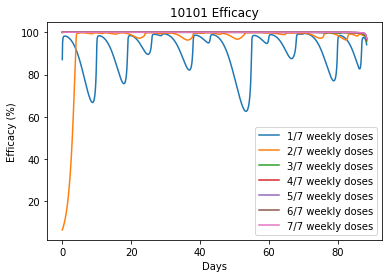

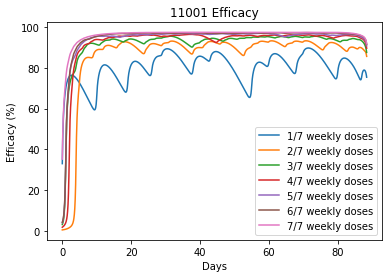

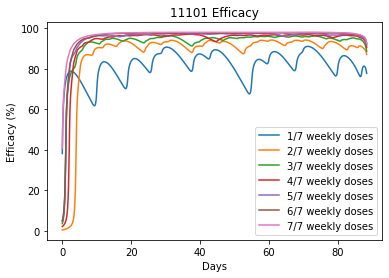

In [5]:
hypoth = [10001, 10101, 11001, 11101]
for hyp in hypoth:
    plot_phi(hyp)
    plt.show()

In [38]:
t = [t/24 for t in range(-1,90*24)]
print(t)

[-0.041666666666666664, 0.0, 0.041666666666666664, 0.08333333333333333, 0.125, 0.16666666666666666, 0.20833333333333334, 0.25, 0.2916666666666667, 0.3333333333333333, 0.375, 0.4166666666666667, 0.4583333333333333, 0.5, 0.5416666666666666, 0.5833333333333334, 0.625, 0.6666666666666666, 0.7083333333333334, 0.75, 0.7916666666666666, 0.8333333333333334, 0.875, 0.9166666666666666, 0.9583333333333334, 1.0, 1.0416666666666667, 1.0833333333333333, 1.125, 1.1666666666666667, 1.2083333333333333, 1.25, 1.2916666666666667, 1.3333333333333333, 1.375, 1.4166666666666667, 1.4583333333333333, 1.5, 1.5416666666666667, 1.5833333333333333, 1.625, 1.6666666666666667, 1.7083333333333333, 1.75, 1.7916666666666667, 1.8333333333333333, 1.875, 1.9166666666666667, 1.9583333333333333, 2.0, 2.0416666666666665, 2.0833333333333335, 2.125, 2.1666666666666665, 2.2083333333333335, 2.25, 2.2916666666666665, 2.3333333333333335, 2.375, 2.4166666666666665, 2.4583333333333335, 2.5, 2.5416666666666665, 2.5833333333333335, 2

### Check output of hypothesis_tester.py

In [22]:
# look into output of hypothesis_tester.py
iprex = np.load("../iPrEx.npy")
print(iprex)
print(iprex.shape)

iprex_inf = np.asarray(34 - iprex[0])

iprex_inf = iprex_inf[iprex_inf>=0]
print(iprex_inf)
print(iprex_inf.shape)
data = iprex_inf
print("Mean:", np.mean(data), "median", np.median(data), "95% quantile range: ", np.quantile(data, (0.025, 0.975)))


[[29 31 23 ... 25 38 41]
 [ 3  2  1 ...  2  2  1]
 [ 1  0  2 ...  1  1  2]
 [ 6  2  3 ...  4  5  7]
 [ 2  3  3 ...  4  3  3]]
(5, 10000)
[ 5  3 11 ...  6  4  9]
(6462,)
Mean: 6.536056948313216 median 6.0 95% quantile range:  [ 0. 17.]


In [23]:
# look into output of hypothesis_tester.py

hptn083 = np.load("../HPTN083.npy")
print(hptn083)
print(hptn083.shape)
hptn083_inf = np.asarray(39 - hptn083[0])
print(hptn083_inf)

hptn083_inf_larger_than0 = sum(hptn083_inf < 0)
print(hptn083_inf_larger_than0)
hptn083_infection_drug = hptn083_inf[:-hptn083_inf_larger_than0]
print(hptn083_infection_drug)
print(hptn083_infection_drug.shape)

hptn083_inf = hptn083_inf[hptn083_inf>=0]
print(hptn083_inf)
print(hptn083_inf.shape)

data = hptn083_inf
print("Mean:", np.mean(data), "median", np.median(data), "95% quantile range: ", np.quantile(data, (0.025, 0.975)))


[[43 41 27 ... 44 31 26]
 [12 15  6 ... 13 12 14]
 [16 13  8 ... 13  9  5]
 [32 30 18 ... 27 20 16]
 [36 37 24 ... 32 30 12]]
(5, 10000)
[-4 -2 12 ... -5  8 13]
3913
[-4 -2 12 ... -4 11  5]
(6087,)
[12  8  9 ... 21  8 13]
(6087,)
Mean: 6.546903236405455 median 6.0 95% quantile range:  [ 0. 18.]


In [27]:
hptn083_1 = hptn083[1]
data = hptn083_1
print("Mean:", np.mean(data), "median", np.median(data), "95% quantile range: ", np.quantile(data, (0.025, 0.975)))

p, infection = np.histogram(data, bins=np.unique(data), density=True)
p_inf_dict = dict(zip(infection, p))
print(p_inf_dict)

Mean: 14.1254 median 14.0 95% quantile range:  [ 6. 24.]
{0: 0.0001, 1: 0.0001, 2: 0.0004, 3: 0.001, 4: 0.0044, 5: 0.0097, 6: 0.0147, 7: 0.0253, 8: 0.0364, 9: 0.0569, 10: 0.0653, 11: 0.0773, 12: 0.0884, 13: 0.0913, 14: 0.0882, 15: 0.086, 16: 0.0737, 17: 0.0627, 18: 0.0566, 19: 0.0445, 20: 0.0318, 21: 0.0272, 22: 0.0174, 23: 0.0139, 24: 0.0086, 25: 0.006, 26: 0.0044, 27: 0.0031, 28: 0.0012, 29: 0.0012, 30: 0.0008, 31: 0.0005, 32: 0.0005, 33: 0.0002, 34: 0.0002}


### Empirical p_value calculated for each hypothesis for both iPrEx and HPTN 083

Here I only used the mean and CI for sampling - should i sample from the entire distribution instead?

In [10]:
def calculate_p_value(inf_dist, mean_inf, ci_inf, inf_dist_hyp, hypothesis):
    
    # Define the mean and 95% confidence interval for hypothesis X (H0)
    mean_clinical = mean_inf
    CI_clinical = ci_inf
    
    data = inf_dist_hyp
    mean_X = np.mean(data) 
    CI_X = np.quantile(data, (0.025, 0.975))
    print("Mean:", np.mean(data), "median", np.median(data), "95% quantile range: ", np.quantile(data, (0.025, 0.975)))

    p, infection = np.histogram(data, bins=np.unique(data), density=True)
    p_inf_dict = dict(zip(infection, p))
    print(p_inf_dict)
    
    keys1, values1 = np.array(list(inf_dist.keys())), np.array(list(inf_dist.values()))
    keys2, values2 = np.array(list(p_inf_dict.keys())), np.array(list(p_inf_dict.values()))

    plt.bar(keys1, values1, color = 'r', label = "drug detected")
    plt.bar(keys2, values2, color = 'g', label = f"{hypothesis}")
    plt.legend()
    plt.xlabel("Number of infected")
    plt.ylabel("probability")
    plt.show()
    
    num_simulations = 100000

    # Function to generate random samples from normal distribution within specified confidence interval
    def generate_samples(mean, CI, size):
        lower, upper = CI
        return np.random.normal(loc=mean, scale=(upper - lower) / 4, size=size)

    # Generate random samples for hypothesis X and clinical estimate
    samples_X = generate_samples(mean_X, CI_X, num_simulations)
    samples_clinical = generate_samples(mean_clinical, CI_clinical, num_simulations)

    # Calculate the proportion of simulation pairs where null hypothesis is true
    count = np.sum(samples_X <= samples_clinical)
    p_value = count / num_simulations

    print("P-value:", p_value)

    print("")
    print("----------------------------------------------------------")
    print("")

 The P value tests for differences in the number of infected individuals deduced 
from bottom-up modeling versus clinical data. The P value was empirically calculated by computing the proportion of 100000 simulation pairs, for which the null hypothesis was true (that is, H0: 
P = no. of simulations where infected individuals from hypothesis X was equal to or less than clinical estimate/total no. of simulations; H1: no. of infected individuals from hypothesis X more 
than the corresponding clinical estimate)

Standard hypothesis testing would have caused too much type 1 error. In statistical hypothesis testing, a type I error, or a false positive

hptn083
Mean: 13.4272 median 13.0 95% quantile range:  [ 6. 23.]
{1: 0.0002, 2: 0.0009, 3: 0.0017, 4: 0.0045, 5: 0.0118, 6: 0.0192, 7: 0.0325, 8: 0.0479, 9: 0.0614, 10: 0.079, 11: 0.0908, 12: 0.0943, 13: 0.0908, 14: 0.0893, 15: 0.0784, 16: 0.0702, 17: 0.0602, 18: 0.0434, 19: 0.0364, 20: 0.0256, 21: 0.0203, 22: 0.0135, 23: 0.0091, 24: 0.0062, 25: 0.005, 26: 0.0031, 27: 0.0026, 28: 0.001, 29: 0.0003, 30: 0.0002, 31: 0.0002}


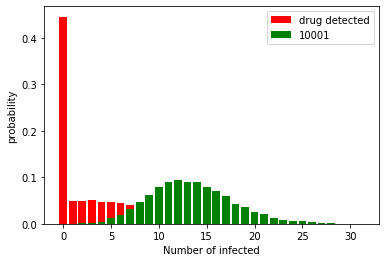

P-value: 0.02496

----------------------------------------------------------

Mean: 11.235 median 11.0 95% quantile range:  [ 4. 19.]
{1: 0.0005, 2: 0.0021, 3: 0.0065, 4: 0.0174, 5: 0.0298, 6: 0.0427, 7: 0.0635, 8: 0.0853, 9: 0.1016, 10: 0.1029, 11: 0.1028, 12: 0.1031, 13: 0.0787, 14: 0.0719, 15: 0.053, 16: 0.0424, 17: 0.0322, 18: 0.0223, 19: 0.0168, 20: 0.0098, 21: 0.0057, 22: 0.0035, 23: 0.002, 24: 0.0016, 25: 0.001, 26: 0.0004, 27: 0.0003, 28: 5e-05}


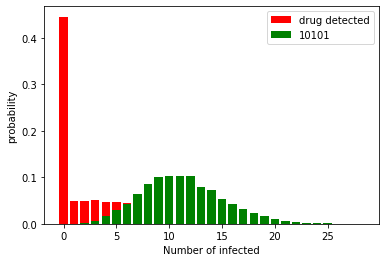

P-value: 0.0477

----------------------------------------------------------

Mean: 25.8981 median 26.0 95% quantile range:  [14. 40.]
{6: 5e-05, 8: 0.0004, 9: 0.0007, 10: 0.0025, 11: 0.0029, 12: 0.006, 13: 0.0076, 14: 0.0108, 15: 0.0164, 16: 0.0205, 17: 0.0289, 18: 0.0336, 19: 0.0405, 20: 0.0468, 21: 0.0514, 22: 0.0524, 23: 0.0593, 24: 0.0606, 25: 0.0556, 26: 0.0614, 27: 0.0584, 28: 0.0507, 29: 0.0498, 30: 0.0468, 31: 0.0397, 32: 0.0355, 33: 0.0329, 34: 0.026, 35: 0.0201, 36: 0.017, 37: 0.0147, 38: 0.0106, 39: 0.0086, 40: 0.0085, 41: 0.0052, 42: 0.0047, 43: 0.0033, 44: 0.0027, 45: 0.001, 46: 0.0009, 47: 0.0016, 48: 0.0009, 49: 0.0005, 50: 0.0002, 51: 0.0008, 52: 0.0003, 53: 5e-05}


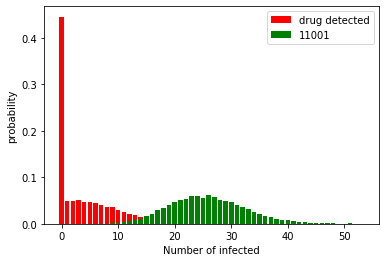

P-value: 0.00086

----------------------------------------------------------

Mean: 23.7867 median 23.0 95% quantile range:  [12. 37.]
{5: 0.0002, 6: 0.0001, 7: 0.0006, 8: 0.0005, 9: 0.0023, 10: 0.004, 11: 0.0071, 12: 0.0105, 13: 0.0152, 14: 0.0205, 15: 0.0231, 16: 0.0365, 17: 0.0411, 18: 0.0461, 19: 0.0524, 20: 0.0605, 21: 0.0633, 22: 0.0629, 23: 0.0636, 24: 0.0621, 25: 0.0594, 26: 0.0572, 27: 0.0494, 28: 0.0402, 29: 0.0404, 30: 0.0337, 31: 0.028, 32: 0.0231, 33: 0.0196, 34: 0.0176, 35: 0.0137, 36: 0.0113, 37: 0.0089, 38: 0.0064, 39: 0.0049, 40: 0.0036, 41: 0.0027, 42: 0.0023, 43: 0.0016, 44: 0.0007, 45: 0.0009, 46: 0.0003, 47: 0.0002, 48: 0.0006, 49: 0.0001, 50: 0.0002, 51: 0.0001, 52: 3.333333333333333e-05, 55: 4e-05}


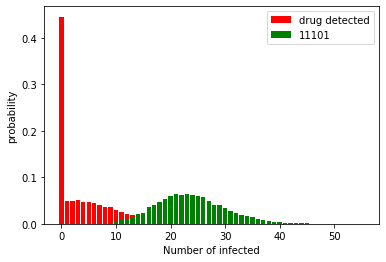

P-value: 0.00166

----------------------------------------------------------



In [9]:
hptn083 = np.load("../HPTN083.npy")
iprex = np.load("../iPrEx.npy")
tdf = np.load("../TDF2.npy")
partners = np.load("../ParntersPrEP.npy")
ipergay = np.load("../IPERGAY.npy")

hypoth = [10001, 10101, 11001, 11101]
"""
inf_dist_hptn083 = {28: 1e-05, 27: 4e-05, 26: 9e-05, 25: 0.00021, 24: 0.00035, 23: 0.00059, 
            22: 0.00073, 21: 0.00176, 20: 0.00231, 19: 0.0033, 18: 0.00494, 17: 0.00697, 
            16: 0.00913, 15: 0.01224, 14: 0.01475, 13: 0.01869, 12: 0.02195, 11: 0.02643, 
            10: 0.03052, 9: 0.03573, 8: 0.0371, 7: 0.04055, 6: 0.04424, 5: 0.04585, 4: 0.04768, 
            3: 0.0503, 2: 0.04962, 1: 0.04847, 0: 0.44545}
"""

# inf_dist, mean_inf, ci_inf, inf_dist_hyp, hypothesis

inf_dist_iprex = {28: 1e-05, 27: 3e-05, 26: 5e-05, 25: 0.00012, 24: 0.00019, 23: 0.00053, 
                  22: 0.00091, 21: 0.00106, 20: 0.00184, 19: 0.00314, 18: 0.00471, 
                  17: 0.00707, 16: 0.00965, 15: 0.01307, 14: 0.01587, 13: 0.02028, 
                  12: 0.02508, 11: 0.03009, 10: 0.03422, 9: 0.03782, 8: 0.04339, 
                  7: 0.04597, 6: 0.04948, 5: 0.05178, 4: 0.05193, 3: 0.05293, 2: 0.05155, 
                  1: 0.04863, 0: 0.39860000000000007}

inf_dist_tdf2 = {2: 0.25256, 1: 0.25373, 0: 0.49371}

inf_dist_partners = {4: 0.06268, 3: 0.12683, 2: 0.15968, 1: 0.15761, 0: 0.49319999999999997}

inf_dist_ipergay = {2: 0.12422, 1: 0.19902, 0: 0.67676}


print("hptn083")
for i in range(0,4):
    calculate_p_value(inf_dist = inf_dist_hptn083, mean_inf = 3, ci_inf = (0,17), 
                      inf_dist_hyp = hptn083[i+1], hypothesis = hypoth[i])

iprex
Mean: 1.6215 median 1.0 95% quantile range:  [0. 5.]
{0: 0.2045, 1: 0.3187, 2: 0.2516, 3: 0.1391, 4: 0.0584, 5: 0.0198, 6: 0.0058, 7: 0.0021}


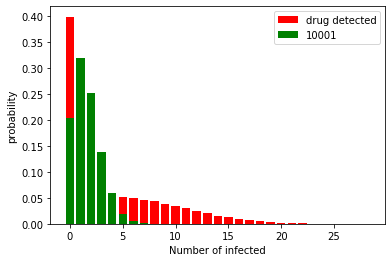

P-value: 0.62792

----------------------------------------------------------

Mean: 1.29 median 1.0 95% quantile range:  [0. 4.]
{0: 0.2824, 1: 0.3521, 2: 0.2184, 3: 0.1019, 4: 0.0343, 5: 0.0077, 6: 0.0028, 7: 0.0004}


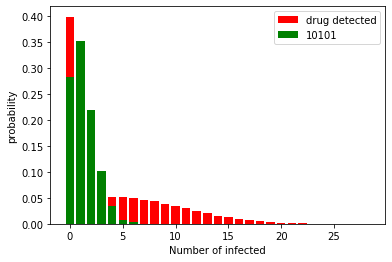

P-value: 0.65781

----------------------------------------------------------

Mean: 3.5391 median 3.0 95% quantile range:  [0. 8.]
{0: 0.0327, 1: 0.1104, 2: 0.1866, 3: 0.2031, 4: 0.1801, 5: 0.1303, 6: 0.0786, 7: 0.0457, 8: 0.0192, 9: 0.0085, 10: 0.0025, 11: 0.0011, 12: 0.0007, 13: 0.0002, 14: 0.0001, 15: 0.0001}


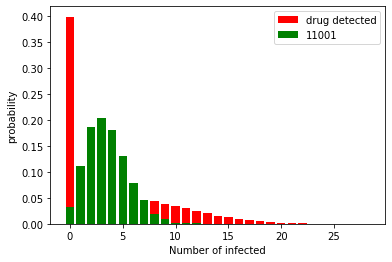

P-value: 0.45097

----------------------------------------------------------

Mean: 3.2535 median 3.0 95% quantile range:  [0. 8.]
{0: 0.0462, 1: 0.1303, 2: 0.2076, 3: 0.2128, 4: 0.1698, 5: 0.1098, 6: 0.0637, 7: 0.0334, 8: 0.0172, 9: 0.0058, 10: 0.0022, 11: 0.0009, 12: 0.0003}


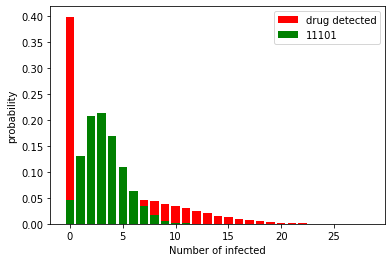

P-value: 0.47545

----------------------------------------------------------



In [21]:
print("iprex")
for i in range(0,4):
    calculate_p_value(inf_dist = inf_dist_iprex, mean_inf = 3, ci_inf = (0,16), 
                      inf_dist_hyp = iprex[i+1], hypothesis = hypoth[i])

In [2]:
import random

def calculate_dist_p_value(inf_dist, inf_dist_hyp, hypothesis):
    
    # Define the mean and 95% confidence interval for hypothesis X (H0)
    # comparing the distribution overlap
    
    data = inf_dist_hyp
    mean_X = np.mean(data) 
    CI_X = np.quantile(data, (0.025, 0.975))
    print("Mean:", np.mean(data), "median", np.median(data), "95% quantile range: ", np.quantile(data, (0.025, 0.975)))

    p, infection = np.histogram(data, bins=np.unique(data), density=True)
    p_inf_dict = dict(zip(infection, p))
    print(p_inf_dict)
    
    keys1, values1 = np.array(list(inf_dist.keys())), np.array(list(inf_dist.values()))
    keys2, values2 = np.array(list(p_inf_dict.keys())), np.array(list(p_inf_dict.values()))

    plt.bar(keys1, values1, color = 'r', label = "drug detected")
    plt.bar(keys2, values2, color = 'g', label = f"{hypothesis}")
    plt.legend()
    plt.xlabel("Number of infected")
    plt.ylabel("probability")
    plt.show()
    
    num_simulations = 100000
    # this number of simualtions leads to small error bars/uncertainties
    

    # Function to generate random samples from normal distribution within specified confidence interval
    def generate_samples(prob_distribution, size):
        values = list(prob_distribution.keys())
        probabilities = list(prob_distribution.values())

        # Draw 100,000 values randomly according to the probability distribution
        random_values = random.choices(values, weights=probabilities, k=size)
        random_values = np.asarray(random_values)
        return random_values

    # Generate random samples for hypothesis X and clinical estimate
    # hypothesis X
    samples_X = generate_samples(p_inf_dict, num_simulations)
    # clinical estimate
    samples_clinical = generate_samples(inf_dist, num_simulations)
    
    print(samples_X[:100])
    print(samples_clinical[:100])
    # Calculate the proportion of simulation pairs where null hypothesis is true
    count = np.sum(samples_X <= samples_clinical)
    print(count)
    p_value = count / num_simulations

    print("P-value:", p_value)

    print("")
    print("----------------------------------------------------------")
    print("")

In [3]:
hptn083 = np.load("../HPTN083.npy")
iprex = np.load("../iPrEx.npy")
hypoth = [10001, 10101, 11001, 11101]
"""
inf_dist_hptn083 = {28: 1e-05, 27: 4e-05, 26: 9e-05, 25: 0.00021, 24: 0.00035, 23: 0.00059, 
            22: 0.00073, 21: 0.00176, 20: 0.00231, 19: 0.0033, 18: 0.00494, 17: 0.00697, 
            16: 0.00913, 15: 0.01224, 14: 0.01475, 13: 0.01869, 12: 0.02195, 11: 0.02643, 
            10: 0.03052, 9: 0.03573, 8: 0.0371, 7: 0.04055, 6: 0.04424, 5: 0.04585, 4: 0.04768, 
            3: 0.0503, 2: 0.04962, 1: 0.04847, 0: 0.44545}

inf_dist_hptn083 = {36: 1e-05, 35: 1e-05, 34: 6e-05, 33: 0.00026, 32: 0.00056, 
                    31: 0.00098, 30: 0.00185, 29: 0.00352, 28: 0.00529, 27: 0.0087, 
                    26: 0.01181, 25: 0.01602, 24: 0.02165, 23: 0.02801, 22: 0.03592, 
                    21: 0.0401, 20: 0.04625, 19: 0.04975, 18: 0.05415, 17: 0.05866, 
                    16: 0.05926, 15: 0.06035, 14: 0.05871, 13: 0.05585, 12: 0.05325, 
                    11: 0.04972, 10: 0.04312, 9: 0.04019, 8: 0.03553, 7: 0.02963, 6: 0.02513, 
                    5: 0.02189, 4: 0.0173, 3: 0.01433, 2: 0.01179, 1: 0.00973, 0: 0.030660000000000243}
# inf_dist, mean_inf, ci_inf, inf_dist_hyp, hypothesis


inf_dist_hptn083 = {30: 1e-05, 28: 3e-05, 27: 0.00011, 26: 0.00018, 25: 0.00025, 
                    24: 0.00041, 23: 0.00074, 22: 0.00151, 21: 0.00204, 20: 0.00336, 
                    19: 0.00468, 18: 0.00655, 17: 0.00896, 16: 0.01227, 15: 0.01437, 
                    14: 0.01779, 13: 0.02241, 12: 0.02474, 11: 0.03086, 10: 0.03419, 
                    9: 0.03801, 8: 0.04248, 7: 0.0454, 6: 0.04673, 5: 0.05045, 
                    4: 0.04934, 3: 0.05023, 2: 0.04715, 1: 0.04797, 0: 0.39678}
"""
inf_dist_hptn083 = {31: 3e-05, 30: 6e-05, 29: 8e-05, 28: 0.00022, 27: 0.00032, 
                    26: 0.00065, 25: 0.00086, 24: 0.00149, 23: 0.00252, 22: 0.00317, 
                    21: 0.00533, 20: 0.00736, 19: 0.01049, 18: 0.01382, 17: 0.01699, 
                    16: 0.0212, 15: 0.02491, 14: 0.03016, 13: 0.03448, 12: 0.03913, 
                    11: 0.04276, 10: 0.04562, 9: 0.0484, 8: 0.05152, 7: 0.05221, 6: 0.05052, 
                    5: 0.05013, 4: 0.04957, 3: 0.0472, 2: 0.04503, 1: 0.04046, 0: 0.26330999999999993}

inf_dist_iprex = {28: 1e-05, 27: 3e-05, 26: 5e-05, 25: 0.00012, 24: 0.00019, 23: 0.00053, 
                  22: 0.00091, 21: 0.00106, 20: 0.00184, 19: 0.00314, 18: 0.00471, 
                  17: 0.00707, 16: 0.00965, 15: 0.01307, 14: 0.01587, 13: 0.02028, 
                  12: 0.02508, 11: 0.03009, 10: 0.03422, 9: 0.03782, 8: 0.04339, 
                  7: 0.04597, 6: 0.04948, 5: 0.05178, 4: 0.05193, 3: 0.05293, 2: 0.05155, 
                  1: 0.04863, 0: 0.39860000000000007}

inf_dist_tdf2 = {2: 0.25256, 1: 0.25373, 0: 0.49371}

inf_dist_partners = {4: 0.06268, 3: 0.12683, 2: 0.15968, 1: 0.15761, 0: 0.49319999999999997}

inf_dist_ipergay = {2: 0.12422, 1: 0.19902, 0: 0.67676}

hptn083
Mean: 13.4272 median 13.0 95% quantile range:  [ 6. 23.]
{1: 0.0002, 2: 0.0009, 3: 0.0017, 4: 0.0045, 5: 0.0118, 6: 0.0192, 7: 0.0325, 8: 0.0479, 9: 0.0614, 10: 0.079, 11: 0.0908, 12: 0.0943, 13: 0.0908, 14: 0.0893, 15: 0.0784, 16: 0.0702, 17: 0.0602, 18: 0.0434, 19: 0.0364, 20: 0.0256, 21: 0.0203, 22: 0.0135, 23: 0.0091, 24: 0.0062, 25: 0.005, 26: 0.0031, 27: 0.0026, 28: 0.001, 29: 0.0003, 30: 0.0002, 31: 0.0002}


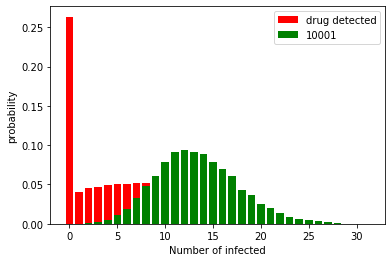

[12 15 12  9  9  7  8 10  8  8 14 18 15 27 19 11 12 14 18  7 13 12 11 11
 16 10 14 14 13 12 14 13 12 14  6  5 10  8 13 13 19  7 11 14 11 15 21 10
  7 15 15 14 18  9 14 10  9 15  8 17 15 17 17 12 19 10 17 12 15 16 12 13
 11 12 12 15 16 11 18 10 14 11 13  9 17 13 13  8 10 17  8  9 17 15 12 15
 14  9 26 13]
[12  3 11 12  1  6  9  7 15 18  2 15  9  1 18  6 16  3  0 13  5  0  0 23
 15  0 22  8 10 10  2  2  7  0  1 14 18  4 10  0 11  4  0  3 19  0  6  6
 11 17  0  4  3  5  9  8  9 13  0  8 10  1 19  5 17  3  5  9  1  8  8  0
 11  4 17  6  0  3  0  0  0  0  9 10 16  9 11  6  0  0 16  2  7  7  8  5
 10 18 20  1]
19551
P-value: 0.19551

----------------------------------------------------------

Mean: 11.235 median 11.0 95% quantile range:  [ 4. 19.]
{1: 0.0005, 2: 0.0021, 3: 0.0065, 4: 0.0174, 5: 0.0298, 6: 0.0427, 7: 0.0635, 8: 0.0853, 9: 0.1016, 10: 0.1029, 11: 0.1028, 12: 0.1031, 13: 0.0787, 14: 0.0719, 15: 0.053, 16: 0.0424, 17: 0.0322, 18: 0.0223, 19: 0.0168, 20: 0.0098, 21: 0.0057, 22: 0

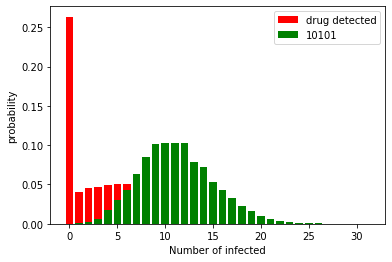

[10 10  8  7 13 16 11  7 19 13  8 16  9 15  4 10  8 13 11  8 14 11  6 17
 12 15  6 13 18  9 12  9 11 10 18 12  5 14 14 12 10  4  3 10 10 12 15 11
 15 17 11 12  9  4 12  6 15 14  4 11  9 12 13 15  4  9 11  7 15  9 11 13
 10 23  9 14 15 17  8 15 11 10 11  7 12 13  9 16 11 16  8 11 11 12  8  5
 19 10 12 17]
[ 5  3  0  2  7  0 11  0 11  0 10  9 22  5  9  4 13  0  3  5  4  2  2 15
 12  4  0  0  2  3 16  8  3 12  0  7  0  0  1  1 11  0  0 17  8  0 11 13
  4 13 13 13  0  9 10 17  4 14  9  8  0 11  7  0  3  0  8 10  0 12  3 10
  0  2  5 13  1 15  0  4  0  1 12 12  0 20 16  0 10  6  5  9  0 10  9  5
  6  0  0  9]
27055
P-value: 0.27055

----------------------------------------------------------

Mean: 25.8981 median 26.0 95% quantile range:  [14. 40.]
{6: 5e-05, 8: 0.0004, 9: 0.0007, 10: 0.0025, 11: 0.0029, 12: 0.006, 13: 0.0076, 14: 0.0108, 15: 0.0164, 16: 0.0205, 17: 0.0289, 18: 0.0336, 19: 0.0405, 20: 0.0468, 21: 0.0514, 22: 0.0524, 23: 0.0593, 24: 0.0606, 25: 0.0556, 26: 0.0614, 27: 0.0584,

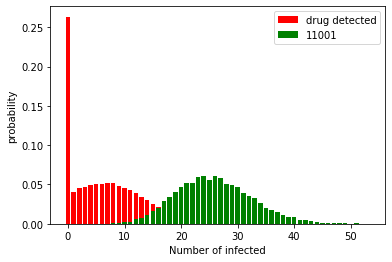

[25 30 30 26 34 19 26 20 26 27 36 29 22 25 28 33 23 33 42 28 22 30 18 39
 30 25 16 34 20 20 22 33 20 27 25 22 35 30 21 32 16 20 34 20 26 34 20 22
 42 19 32 14 36 27 32 31 29 23 26 19 18 37 22 26 14 39 17 35 31 30 22 22
 23 35 29 21 29 26 15 13 33 36 31 37 30 24 29 22 24 17 28 20 28 31 24 35
 20 18 26 31]
[ 0  0  3  0 18  0  0 14  0  6  0  9  7  0  5 12  3  6 19  6  0  9 13 11
  3  0  3  0 19  8  0 15 11 13 11  0  0  5  0 17 20  3  6 16 10  0 15 10
 12  8 12  1 15  0  0 10  1 11  7  0 10  9  0  0  0 12  0  0  3  0 16  0
  3  0  0 14 10  8  0 11  9  3 17 10 10  5  0 12  4  0  4  0  6  2  7  3
 13  0  7  1]
1728
P-value: 0.01728

----------------------------------------------------------

Mean: 23.7867 median 23.0 95% quantile range:  [12. 37.]
{5: 0.0002, 6: 0.0001, 7: 0.0006, 8: 0.0005, 9: 0.0023, 10: 0.004, 11: 0.0071, 12: 0.0105, 13: 0.0152, 14: 0.0205, 15: 0.0231, 16: 0.0365, 17: 0.0411, 18: 0.0461, 19: 0.0524, 20: 0.0605, 21: 0.0633, 22: 0.0629, 23: 0.0636, 24: 0.0621, 25: 0.0594, 2

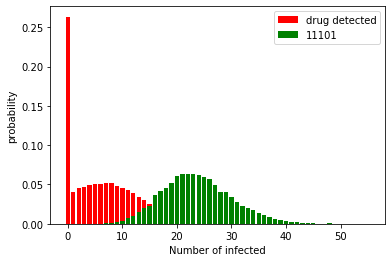

[20 26 15 21 24 32 29 28 28 30 41 33 26 24 23 32 29 24 19 26 23 17 25 27
 29 29 18 16 23 23 19 21 23 27 25 32 26 12 24 22 35 21 29 30 29 33 35 24
 22 17 30 19 21 11 20 28 21 29 33 30 25 17 24 55 25 11 18 21 21 36 21 18
 21 24 20 20 26 28 22 21 22 26 17 10 22 20 38 20 20 10 16 28 21 31 26 19
 20 20 32 23]
[19  0  0 14  2  7  2 10  0  3  0  8 18  0  9  3  0 17  5  0 11 10  7  3
 10  5 11 10  3  9 16  8  0  5 15  0 17 16  7  9 21  5 21 12  0  0  8  0
 10 11 16  4 16  2  3 11  0  0  9  3 12  6 10 18 18 20  4  0  1  5  6  0
  0  9  9 13  0  1  7  3  0 15  8  0  7 12  9  1  0  4 12  0  0  0  9 19
 19 14 17  6]
2815
P-value: 0.02815

----------------------------------------------------------



In [4]:
print("hptn083")
for i in range(0,4):
    calculate_dist_p_value(inf_dist = inf_dist_hptn083, 
                      inf_dist_hyp = hptn083[i+1], hypothesis = hypoth[i])

iprex
Mean: 1.7195 median 2.0 95% quantile range:  [0. 5.]
{0: 0.1845, 1: 0.3152, 2: 0.2479, 3: 0.1499, 4: 0.0659, 5: 0.0272, 6: 0.0068, 7: 0.0026}


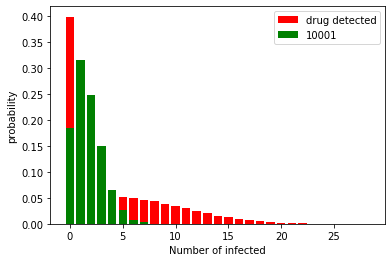

[1 1 3 1 2 0 3 1 0 4 1 3 2 0 2 1 1 3 1 1 3 2 0 1 0 3 1 3 2 2 3 1 2 1 1 1 3
 1 3 2 1 0 3 1 3 0 2 1 1 2 5 3 1 0 3 2 3 1 1 1 0 2 0 4 1 1 4 2 2 2 2 3 2 1
 4 1 1 1 3 1 4 2 0 1 0 4 3 0 3 1 2 3 2 0 4 6 2 1 0 0]
[ 3  0  0  0  9  6  5  5  8  9  0 12  8 11  0  0 11 14  6  0  3 10  0  0
  0 10 21  0 12  3  0  2  9  3  5  5  4  0  0  0  1  4  0  1  7  0  2  3
  0 10  0  0  4  5  0  0  0  2  0 12  6  0  0  0  0 13  0  8  1  9  4  0
  0  0  0  5  0  8  0  0  4  3  7  0  0  0  0  8  0  0  1  3  0  0 15  0
  0  8 12  5]
63160
P-value: 0.6316

----------------------------------------------------------

Mean: 1.3424 median 1.0 95% quantile range:  [0. 4.]
{0: 0.266, 1: 0.3533, 2: 0.2258, 3: 0.1032, 4: 0.0375, 5: 0.0093, 6: 0.0034, 7: 0.0011, 8: 0.0004}


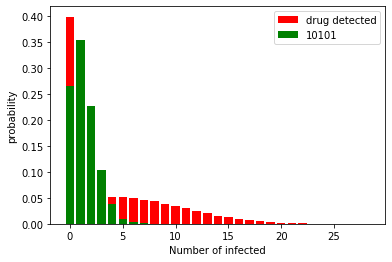

[1 1 1 2 1 3 3 3 1 0 0 0 1 1 0 1 1 2 1 2 0 3 3 2 0 0 0 3 0 1 4 1 0 2 1 3 2
 4 1 1 2 1 0 1 1 2 1 3 3 2 0 0 2 1 2 2 0 0 0 1 2 4 3 3 1 1 0 0 1 2 2 0 1 2
 1 1 1 0 1 2 1 3 1 2 1 2 0 0 1 2 0 5 4 1 2 0 0 1 1 3]
[ 0  3 10  9  6  3  3  0  4  0  4  0  0  9  3  2  4  3  4  4 17  8  0 20
  0  7  4 12  0  0 11  0  8  0  0  2  6  3  0  0  7  6  9  0  4  0  5  3
  3  2  1  6  6  0  5  1  0  0  7  1  0  3  5  0  7  7 11  0  0  0  0  0
  0  0  6  1 11 13  6  0  9  0 11  0  6 14  0  3 12  6  0  0  5  0  0 13
  7  8  1 12]
67710
P-value: 0.6771

----------------------------------------------------------

Mean: 3.6346 median 3.0 95% quantile range:  [0. 8.]
{0: 0.0332, 1: 0.1081, 2: 0.1674, 3: 0.2014, 4: 0.1875, 5: 0.1351, 6: 0.0797, 7: 0.0481, 8: 0.0207, 9: 0.0104, 10: 0.0055, 11: 0.0021, 12: 0.0004}


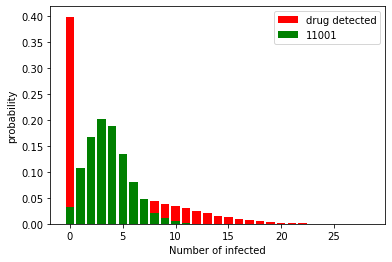

[ 4  7  5  8  1  5  3  5  2  4  1  4  7  5  3  4  6  4  2  2  2  2  3  3
  2  4  3  3  0  7  5  7  2  2  2  2  5  5  2  5  2  5  2  3  4  2  4  4
  2  2  4  7  2  1  1  4  8  8  2  1  0  3  2  6  4  0  1  2  3  6  1  6
  2  4  4  4  3  1  3  5  2  4  3  9  1  5  7  6 10  1  6  4  2  3  4  4
  3  4  6  7]
[ 5 15  0  4  6 10  1  0 16  2 16  3  0  0  8  0  9  2  0  0  7 10  3  0
  3  0  4  0  5  5  4  0  0 11  4  3  2  9 15  7  0 12  8  0  8  4  6  0
  0  6  6  0  4  2  0  5  8  3  1  0  0  0  8 10  0 11  5  1  0 12  8  0
 17  0 16  0  8 15  6  3 11  6  5  2  9  1  9  1  4  6  0  0  2  9  6 18
 11  0  0  0]
48362
P-value: 0.48362

----------------------------------------------------------

Mean: 3.3302 median 3.0 95% quantile range:  [0. 7.]
{0: 0.0424, 1: 0.1268, 2: 0.1946, 3: 0.2126, 4: 0.1732, 5: 0.1213, 6: 0.0675, 7: 0.0376, 8: 0.0135, 9: 0.0064, 10: 0.0024, 11: 0.0013, 12: 0.0002}


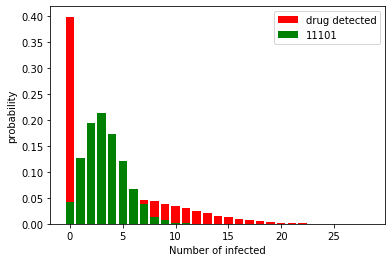

[2 4 2 5 6 3 3 1 5 1 1 1 2 4 5 1 4 3 6 1 5 2 4 1 2 1 6 0 5 2 4 3 2 3 4 3 4
 2 3 3 3 3 3 1 6 1 4 6 4 5 2 3 2 2 6 2 5 4 2 5 6 2 0 4 2 1 9 2 3 2 2 3 4 3
 3 4 2 4 3 4 1 8 5 2 1 1 4 5 2 1 3 2 2 2 3 3 1 5 7 0]
[12  1  0  0  7  0  3  0  0  0  5  8  0  8 10  1  4 15  0 13  9  3  0  0
  0  0  0  5  0  0  0 10  5  0  5 14  0  7  5  0  0  0  4 15  0  0  6  8
  7  3  0  0  9  0  0 11 10  0  2  1 11 18  0  0  0 10  0  1 11  0  0  0
  8  0  2  0  0  5  0 18 10  7  9  0  0 12  2  0  0  2  0  0  0  4  0  5
  8  0 17  0]
49603
P-value: 0.49603

----------------------------------------------------------



In [17]:
print("iprex")
for i in range(0,4):
    calculate_dist_p_value(inf_dist = inf_dist_iprex, 
                      inf_dist_hyp = iprex[i+1], hypothesis = hypoth[i])

In [17]:
tdf2 = np.load("../TDF2.npy")
partners = np.load("../ParntersPrEP.npy")
ipergay = np.load("../IPERGAY.npy")


tdf2
Mean: 0.4634 median 0.0 95% quantile range:  [0. 2.]
{0: 0.6609, 1: 0.2457, 2: 0.0698, 3: 0.018, 4: 0.0043, 5: 0.0011, 6: 0.0001}


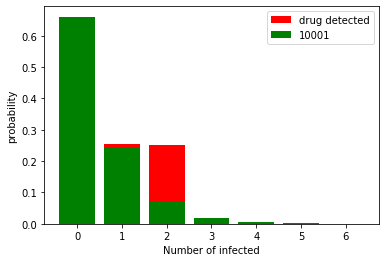

[0 3 0 0 1 1 0 0 1 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 1 4 1 1 0 1 0 1 0 0 1
 1 1 2 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 2 0 1 1 1 0 0 0 0 0 0 1 0 2 0 0 0 0 2
 0 2 0 1 3 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 0 1 1 0 0 1]
[0 0 2 1 1 2 0 0 0 1 1 0 1 2 2 0 0 2 1 1 0 0 1 0 1 2 2 1 0 0 0 0 1 1 2 1 0
 2 0 1 1 2 0 1 1 2 1 2 2 2 1 1 0 0 1 2 0 2 0 1 0 0 2 0 2 2 2 0 0 0 0 0 0 0
 1 0 1 2 1 1 0 0 2 2 2 2 1 0 2 2 0 0 0 2 0 1 1 0 2 1]
80230
P-value: 0.8023

----------------------------------------------------------

Mean: 0.3569 median 0.0 95% quantile range:  [0. 2.]
{0: 0.7226, 1: 0.2146, 2: 0.0488, 3: 0.0121, 4: 0.0013, 5: 0.0006}


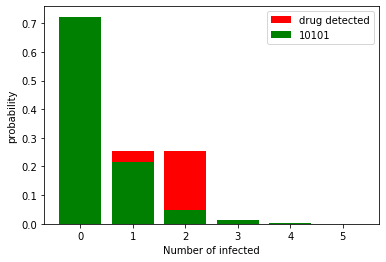

[0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 0 0
 1 1 0 0 1 1 2 0 2 0 1 0 0 0 1 1 1 1 0 0 2 0 1 0 1 0]
[1 2 0 0 0 2 0 0 2 2 2 1 0 0 0 1 2 2 0 2 2 0 0 1 0 0 2 1 0 0 1 1 1 0 0 0 0
 2 0 0 0 1 0 1 0 0 1 0 1 2 2 1 0 2 0 2 0 0 1 0 2 0 1 1 0 0 0 0 0 0 0 1 0 0
 2 1 0 1 0 1 2 1 1 2 0 2 2 0 1 2 0 0 0 0 1 0 0 2 2 0]
84265
P-value: 0.84265

----------------------------------------------------------

Mean: 0.9338 median 1.0 95% quantile range:  [0. 4.]
{0: 0.4622, 1: 0.3027, 2: 0.1385, 3: 0.0555, 4: 0.026, 5: 0.0101, 6: 0.003, 7: 0.0012, 8: 0.0006, 9: 0.0002}


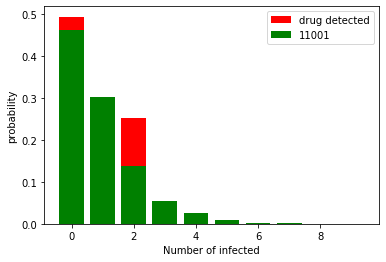

[0 2 1 1 2 1 0 1 1 0 0 2 1 0 2 1 1 0 1 1 1 3 0 0 3 2 1 2 1 0 1 2 1 0 1 0 1
 0 0 0 2 0 0 1 1 2 1 1 0 2 0 0 0 0 2 1 0 0 1 0 2 0 1 1 0 2 1 4 1 1 0 6 0 1
 2 4 1 2 0 0 0 4 2 0 0 0 1 2 0 0 0 2 1 0 0 3 1 3 1 1]
[2 0 0 0 0 0 1 2 1 0 0 0 0 2 0 2 0 1 0 0 1 2 1 2 1 0 1 0 2 2 1 2 2 0 1 1 0
 0 0 0 0 0 2 0 2 0 2 0 0 0 0 2 1 1 0 0 0 0 0 0 1 0 1 2 0 0 0 0 0 2 0 2 0 2
 2 0 2 2 2 0 0 0 0 2 1 1 2 0 2 0 1 1 1 1 0 0 2 0 2 1]
64965
P-value: 0.64965

----------------------------------------------------------

Mean: 0.8581 median 1.0 95% quantile range:  [0. 4.]
{0: 0.4939, 1: 0.2858, 2: 0.1344, 3: 0.056, 4: 0.0192, 5: 0.007, 6: 0.0027, 7: 0.0007, 8: 0.0003}


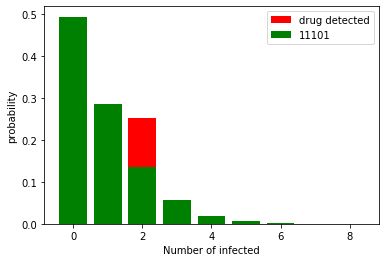

[0 2 0 0 1 0 2 0 1 2 1 0 0 1 0 0 0 0 4 3 0 0 0 1 0 0 1 0 0 3 2 1 1 0 3 0 0
 1 2 1 1 0 1 1 1 1 2 0 0 1 0 0 0 0 0 0 1 2 0 2 4 5 0 2 1 1 2 0 4 1 1 0 1 1
 0 0 0 3 1 3 1 0 2 2 0 2 1 0 1 1 3 1 1 0 1 0 0 1 2 0]
[0 0 0 0 0 0 0 1 0 2 0 1 2 0 2 0 2 0 0 0 0 0 1 1 0 0 0 0 2 2 0 2 0 0 1 2 0
 2 2 0 2 2 0 1 2 2 0 1 1 0 0 0 0 0 0 0 0 2 1 0 2 2 2 0 0 0 0 0 2 0 0 0 2 1
 0 0 0 1 0 0 2 2 1 1 0 2 0 0 0 2 1 1 1 2 1 0 1 1 0 0]
67179
P-value: 0.67179

----------------------------------------------------------



In [14]:
print("tdf2")
for i in range(0,4):
    calculate_dist_p_value(inf_dist = inf_dist_tdf2, 
                      inf_dist_hyp = tdf2[i+1], hypothesis = hypoth[i])

partners
Mean: 1.0149 median 1.0 95% quantile range:  [0. 4.]
{0: 0.4075, 1: 0.3219, 2: 0.1674, 3: 0.0687, 4: 0.0244, 5: 0.0072, 6: 0.0021, 7: 0.0006, 8: 0.0002}


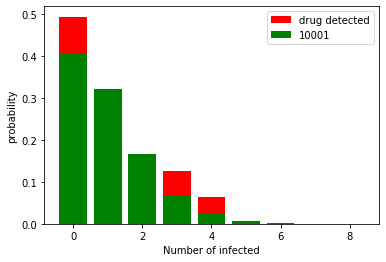

[0 0 1 1 1 0 1 0 0 0 5 1 0 1 1 3 0 0 4 1 0 0 1 1 1 0 3 0 1 1 0 0 3 1 3 5 0
 2 0 0 1 2 1 0 1 0 2 1 0 0 1 0 0 3 0 2 2 3 2 0 0 1 0 1 2 1 2 0 1 1 2 0 0 0
 0 6 0 1 0 2 1 0 0 1 0 0 1 1 0 0 0 0 2 0 0 3 2 2 1 1]
[0 0 1 0 0 1 0 4 2 3 1 1 1 0 3 4 0 0 2 0 0 0 2 1 0 1 1 0 2 3 0 3 0 0 4 0 0
 0 0 0 3 0 0 1 0 0 1 2 0 3 2 4 0 3 0 0 1 1 0 3 2 2 2 0 3 0 2 3 2 0 2 0 1 2
 2 2 0 1 2 0 3 1 0 0 0 0 0 1 2 2 4 0 3 4 0 0 0 0 0 1]
64227
P-value: 0.64227

----------------------------------------------------------

Mean: 0.7718 median 0.0 95% quantile range:  [0. 3.]
{0: 0.5028, 1: 0.3073, 2: 0.1284, 3: 0.0436, 4: 0.0134, 5: 0.0038, 6: 0.0007}


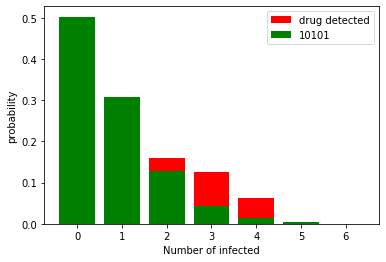

[1 0 0 0 0 3 0 1 0 1 0 0 0 1 0 2 0 1 0 1 2 0 0 0 0 1 0 1 1 0 2 0 0 0 0 1 0
 1 0 0 0 3 1 1 1 1 1 2 1 2 1 0 0 0 1 1 0 0 1 3 0 3 1 2 0 0 1 1 1 0 0 0 0 0
 3 0 0 1 2 0 2 1 0 3 0 2 0 1 0 0 0 0 1 0 1 2 0 1 2 0]
[0 3 0 0 0 0 0 0 2 0 0 4 1 1 1 3 0 0 3 2 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 3
 0 1 0 0 1 1 0 0 0 0 1 3 0 3 1 2 0 1 0 0 1 0 0 0 0 3 3 4 1 4 0 1 4 0 0 3 0
 0 1 0 2 4 0 0 2 0 0 1 0 0 0 0 0 0 1 0 3 4 1 1 3 1 2]
71303
P-value: 0.71303

----------------------------------------------------------

Mean: 1.9725 median 2.0 95% quantile range:  [0. 6.]
{0: 0.1985, 1: 0.2724, 2: 0.2183, 3: 0.1384, 4: 0.0853, 5: 0.0467, 6: 0.0216, 7: 0.0112, 8: 0.0045, 9: 0.0022, 10: 0.0004, 11: 0.0003, 12: 0.0002}


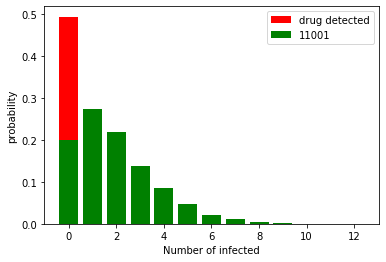

[2 2 1 0 1 3 4 3 6 4 3 1 6 2 2 2 0 4 6 3 4 0 1 1 1 2 1 0 1 1 1 4 2 2 1 2 0
 5 0 4 2 0 3 3 4 2 3 1 1 0 1 5 5 4 0 0 1 4 1 1 4 3 7 1 2 2 4 2 1 1 1 2 2 1
 3 2 2 3 2 1 1 5 0 1 2 4 2 3 2 1 3 1 1 4 0 3 0 3 0 2]
[2 0 1 0 2 1 2 0 1 3 0 2 0 4 1 2 0 0 2 0 0 3 0 3 0 0 1 0 4 2 3 0 0 0 0 0 0
 0 0 4 3 3 1 0 0 2 1 3 1 0 0 3 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 2 0 3 1 0 0
 1 2 0 2 2 2 3 0 2 0 0 0 0 3 3 4 2 0 2 0 4 1 0 4 2 4]
44663
P-value: 0.44663

----------------------------------------------------------

Mean: 1.8027 median 1.0 95% quantile range:  [0. 6.]
{0: 0.2235, 1: 0.2831, 2: 0.2187, 3: 0.1371, 4: 0.0708, 5: 0.0359, 6: 0.0169, 7: 0.0078, 8: 0.0045, 9: 0.0011, 10: 0.0004, 11: 0.0002}


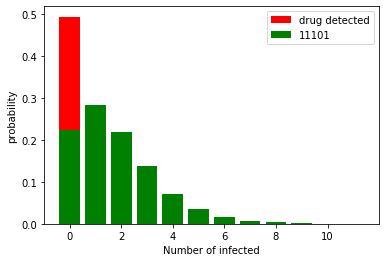

[3 2 2 0 1 4 0 0 1 7 2 0 1 3 1 1 1 4 2 0 2 4 1 1 2 0 0 3 1 0 0 0 1 1 1 3 4
 2 1 0 0 0 2 1 4 0 4 1 0 2 1 1 0 1 0 0 1 4 7 2 1 1 1 2 0 1 0 2 0 5 2 1 2 4
 0 1 3 2 1 1 2 2 3 1 3 3 1 3 2 0 4 1 1 7 1 5 0 4 5 1]
[1 0 1 1 3 4 1 2 4 3 2 4 0 1 0 4 0 2 2 0 2 0 0 3 0 2 3 1 4 0 3 0 0 0 3 0 1
 0 1 0 0 0 2 1 4 0 0 1 0 0 0 0 2 3 0 0 0 3 1 0 2 0 0 1 2 0 0 0 3 0 0 0 0 0
 3 0 0 0 0 4 1 3 4 3 3 1 3 2 2 2 1 2 3 3 3 0 0 0 0 0]
47179
P-value: 0.47179

----------------------------------------------------------



In [15]:
print("partners")
for i in range(0,4):
    calculate_dist_p_value(inf_dist = inf_dist_partners, 
                      inf_dist_hyp = partners[i+1], hypothesis = hypoth[i])

ipergay
Mean: 1.1094 median 1.0 95% quantile range:  [0. 4.]
{0: 0.3921, 1: 0.3126, 2: 0.1681, 3: 0.0771, 4: 0.0317, 5: 0.0122, 6: 0.0043, 7: 0.0007, 8: 0.0007, 9: 0.00015, 11: 6.666666666666666e-05}


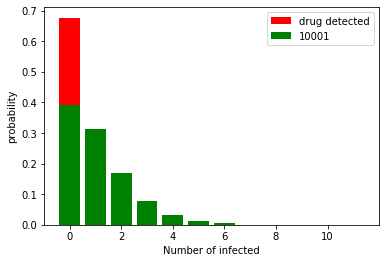

[0 1 2 1 1 4 0 1 3 1 0 0 0 2 0 1 0 1 0 1 1 7 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0
 3 1 1 3 1 2 2 1 4 0 2 0 0 1 3 1 1 1 1 2 2 0 4 1 0 1 0 2 0 0 0 0 2 0 0 2 0
 0 5 1 1 2 0 1 5 1 1 1 1 1 3 0 3 2 0 0 2 0 0 0 3 2 0]
[1 0 0 2 0 0 0 0 1 2 1 0 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 2 0
 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 2 0 0 2 0 1 0 2 2 0 1]
51102
P-value: 0.51102

----------------------------------------------------------

Mean: 0.8354 median 1.0 95% quantile range:  [0. 3.]
{0: 0.4749, 1: 0.321, 2: 0.1314, 3: 0.0485, 4: 0.0172, 5: 0.0054, 6: 0.0011, 7: 0.00025}


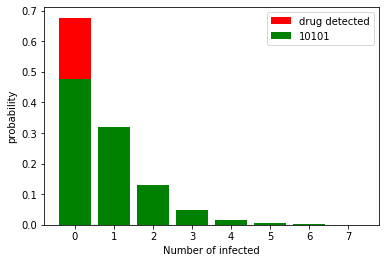

[1 3 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 3 1 0 1 2 1 0 1 1 2 0 1 0 1 0 2 0 0
 0 0 1 0 2 2 0 3 0 2 0 2 1 2 0 0 0 0 4 0 0 3 1 0 0 0 0 2 0 1 0 0 0 1 1 0 0
 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 2 1 3 0 0 0 0 0 2 0 0]
[1 0 1 0 0 0 0 0 0 0 2 2 0 2 0 1 0 1 0 1 2 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0
 1 2 0 1 1 0 0 0 0 0 0 0 0 2 2 0 0 0 0 1 1 2 0 2 0 0 0 1 0 1 1 0 0 0 0 1 2
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0]
59522
P-value: 0.59522

----------------------------------------------------------

Mean: 2.1585 median 2.0 95% quantile range:  [0. 7.]
{0: 0.198, 1: 0.2466, 2: 0.2016, 3: 0.1477, 4: 0.0916, 5: 0.0521, 6: 0.0295, 7: 0.0179, 8: 0.0074, 9: 0.0037, 10: 0.0018, 11: 0.0011, 12: 0.0003, 14: 0.0001, 16: 3.333333333333333e-05}


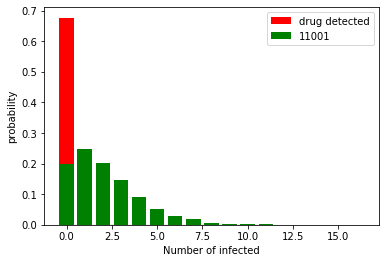

[ 1 11  0  3  1  0  0  1  3  4  1  2  2  2  1  1  6  2  1  1  1  0  0  3
  4  0  4  0  2  3  0  0  6  0  3  0  2  2  3  0  3  3  2  0  4  0  0  4
  6  3  5  0  1  2  0  3  0  3  2  5  1  4  4  5  2  2  1  4  0  4  1  1
  1  0  2  1  0  1  2  2  4  1  3  0  3  2  1  1  5  6  1  1  0  1  1  3
  3  6  0  3]
[0 0 0 2 1 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 1 2 0 0 2 0 0 0 2 0 1 1 1 0
 1 0 0 1 1 0 0 0 1 2 0 2 0 1 0 2 0 0 2 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 1 0 0 0 0]
30200
P-value: 0.302

----------------------------------------------------------

Mean: 1.9826 median 2.0 95% quantile range:  [0. 7.]
{0: 0.2218, 1: 0.2627, 2: 0.2006, 3: 0.1371, 4: 0.0818, 5: 0.0452, 6: 0.0256, 7: 0.0131, 8: 0.006, 9: 0.0026, 10: 0.0021, 11: 0.0005, 13: 0.0002, 14: 0.0002}


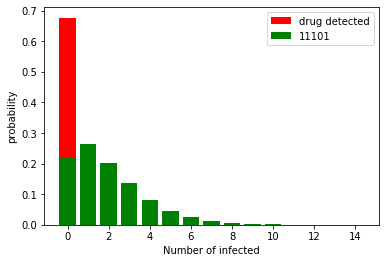

[ 1  4  1  4  1  3  1  2  0  1  1  3  2  3  0  3  2  0  0  1  9 10  3  3
  1  2  1  1  0  2  0  1  0  5  2  1  1  0  1  2  0  0  5  4  1  3  1  1
  3  4  1  2  0  6  6  0  2  2  0  2  0  4  2  2  0  3  2  3  1  3  1  1
  4  2  2  5  1  3  2  1  7  0  9  1  0  3  3  4  0  6  0  2  1  2  3  1
  0  2  1  3]
[1 1 1 2 0 0 0 0 0 0 0 1 1 0 0 2 0 0 0 2 0 0 2 0 0 1 2 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 2 1 0 0 0 0 0 1 0 0 0 2 0 0 1 0 0
 0 0 0 0 0 1 0 2 1 0 0 1 0 0 0 0 0 1 0 1 2 0 1 0 1 0]
32974
P-value: 0.32974

----------------------------------------------------------



In [18]:
print("ipergay")
for i in range(0,4):
    calculate_dist_p_value(inf_dist = inf_dist_ipergay, 
                      inf_dist_hyp = ipergay[i+1], hypothesis = hypoth[i])